# Using code verify the following

a. The average roll of 9 dice is normally distributed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy import stats

In [2]:
def simulate9DieThrowMean():
    N = 10000 # number of simulations
    data = np.zeros(N)
    for i in range(N):
        x = np.sum(np.random.choice([1,2,3,4,5,6], size=(1,9)))/9.0
        data[i] = x
    return data

<Axes: ylabel='Density'>

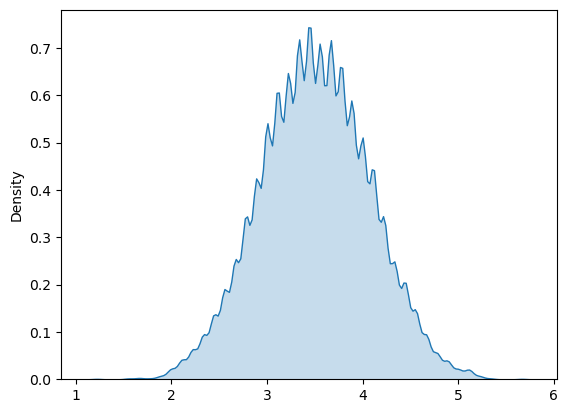

In [3]:
data = simulate9DieThrowMean()
sns.kdeplot(data, bw_adjust=0.5, fill=True)

The density of the data looks normal, we can also use test for normality

In [4]:
# Perform D'Agostino's K^2 Test
stat, p = normaltest(data)

print('D\'Agostino\'s K^2 Test statistics=%.3f, p-value=%.3f' % (stat, p))

# Interpret
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


D'Agostino's K^2 Test statistics=8.022, p-value=0.018
Sample does not look Gaussian (reject H0)


In [5]:
#Verified

b. The observed variance is roughly 1/9 the variance of one die

In [6]:
# Observed variance
np.var(data)

0.3227166388888889

In [7]:
# theoretical variance of single die roll divided by 9
sigmaSquare = 17.5/6
sigmaSquare/9

0.32407407407407407

In [8]:
# Verified b

c. If you use the true variance of 1 die (from math) you capture 3.5 in your confidence interval for the true mean 95% of the time when using the z-score

In [9]:
def simulate9DieThrow():
    x = np.random.choice([1,2,3,4,5,6], size=(1,9))
    return x

In [10]:
# confidence interval
counter = 0
Z = 1.96 # z value for 95% confidence interval

# theoretical variance of single die roll divided by 9
sigmaSquare = 17.5/6

for i in range(100000):
    data = simulate9DieThrow()
    low = np.mean(data) - Z*(np.sqrt(sigmaSquare/9))
    high = np.mean(data) + Z*(np.sqrt(sigmaSquare/9))
    if(low <= 3.5 and high >= 3.5):
        counter += 1
print(counter)

95084


In [11]:
counter/100000

0.95084

In [12]:
# This number will converge to 0.95 as we increase the number of trials
#verified

d. If you use the observed variance of your 9 dice (from math) you capture 3.5 in your confidence interval for the true mean 95% of the time when using the t-score

In [13]:
# confidence interval
counter = 0
t = 2.306 # t-score for 95% confidence interval

for i in range(100000):
    data = simulate9DieThrow()
    observedVariance = np.var(data)
    low = np.mean(data) - t*(np.sqrt(observedVariance/9))
    high = np.mean(data) + t*(np.sqrt(observedVariance/9))
    if(low <= 3.5 and high >= 3.5):
        counter += 1
print(counter)

93467


In [14]:
counter/100000

0.93467

In [15]:
# This number will converge to 0.95 as we increase the number of trials
#verified

e. Assuming Tibetan terriers have a known standard deviation of weight of 8 lbs.  How many dogs do you need to weigh to have a 95% confidence interval that is +/- 2lbs?

In [16]:
# given z*(sigma/sqrt(N)) = 2
# N = ((z*sigma)/2)^2
# given, z= 1.96, sigma = 8
N = ((1.96*8)/2)**2

In [17]:
print("We need to weigh")
print(N)
print("dogs")

We need to weigh
61.465599999999995
dogs


In [18]:
# ie we need to weigh 62 dogs

f. out of 10 parking tickets none were given out on Sunday. Is there a reason to be suspicious that tickets are never given out on Sunday?

In [19]:
# The parking tickets are given if someone violates the rule for parking ie parks in the non parking areas
# People park in non parking areas if they are in hurry (late for work etc)
# Sunday is holiday so there is no hurry and people follow the parking rules easily.
# Hence there are no parking tickets given on sunday
# There is no reason to be suspicious

g. What impact does fast-food consumption have on various dietary and health characteristics? The article “Effects of Fast-Food Consumption on Energy Intake and Diet Quality Among Children in a National Household Study” (Pediatrics, 2004: 112–118) reported the accompanying summary data on daily calorie intake both for a sample of teens who said  they did not typically eat fast food and another sample of teens who said they did usually eat fast food.

No   sample size 663   sample mean 2258    sample SD 1519
Yes   sample size 413   sample mean 2637    sample SD 1138
Does this data provide strong evidence for concluding that true average calorie intake for teens who typically eat fast food exceeds by more than 200 calories per day the true average intake for those who don’t typically eat fast food? 

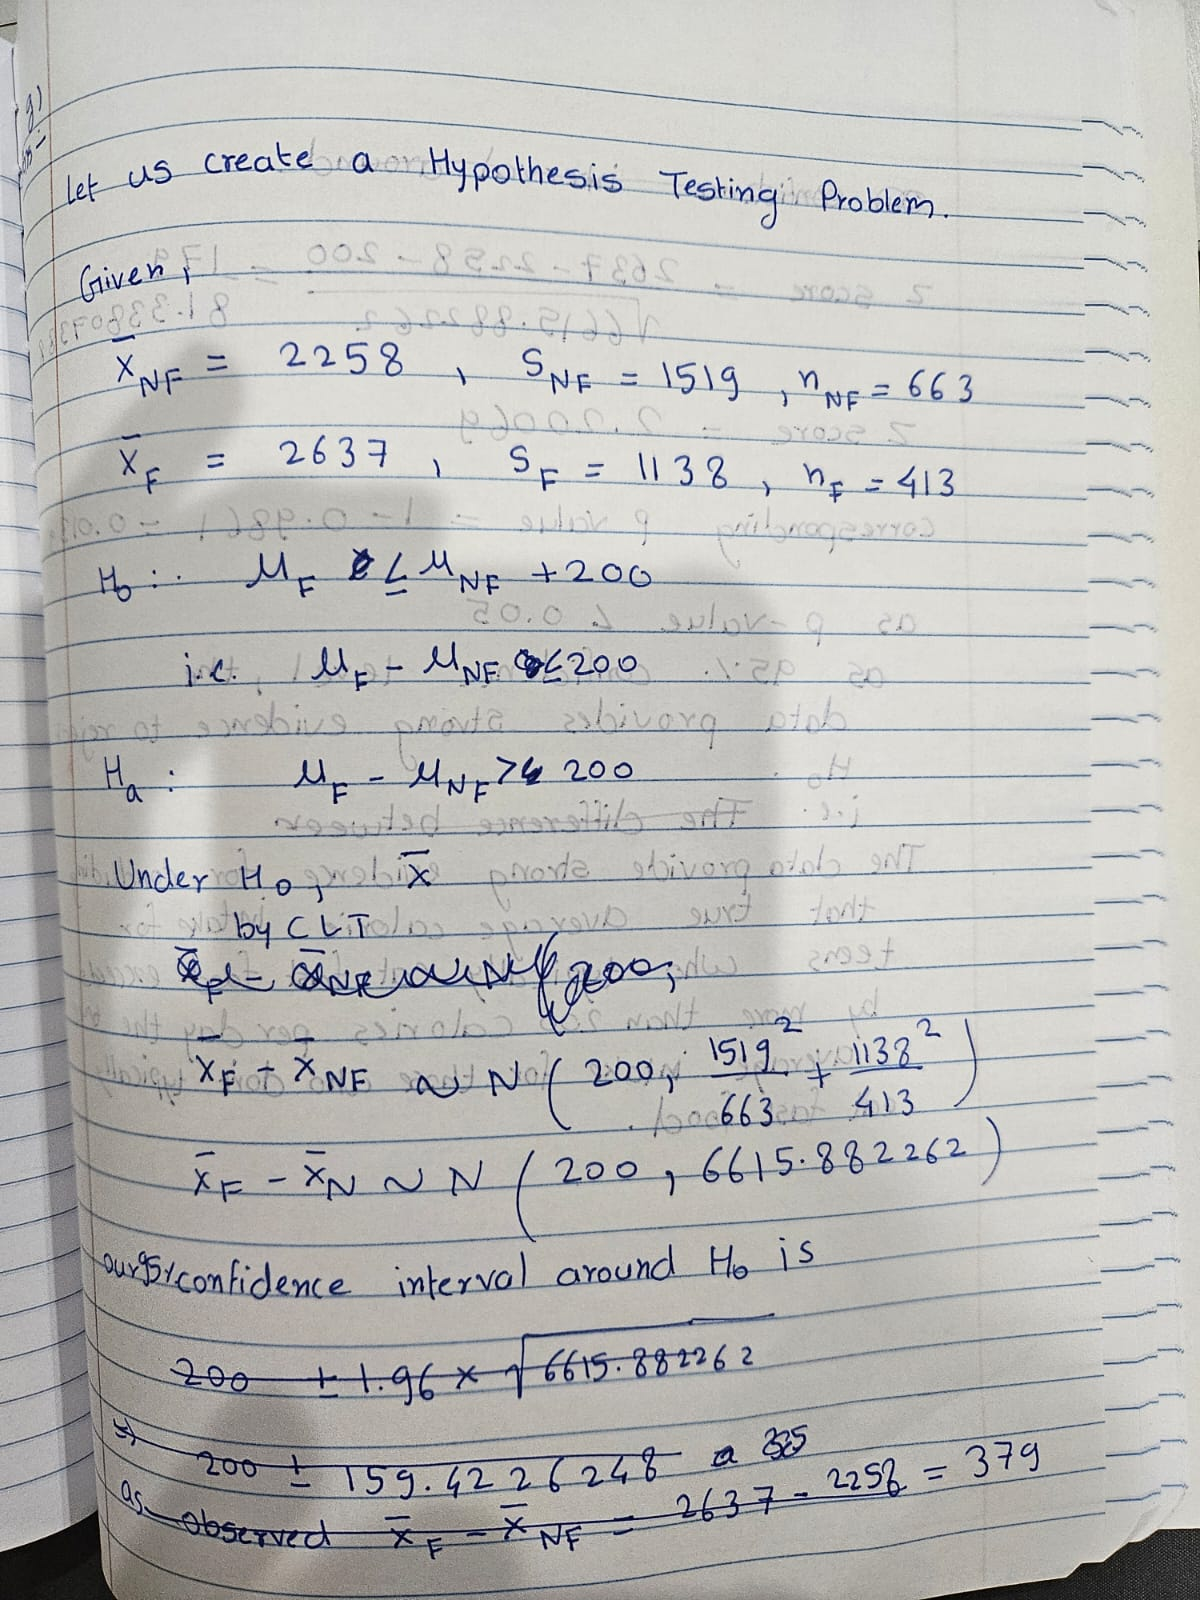

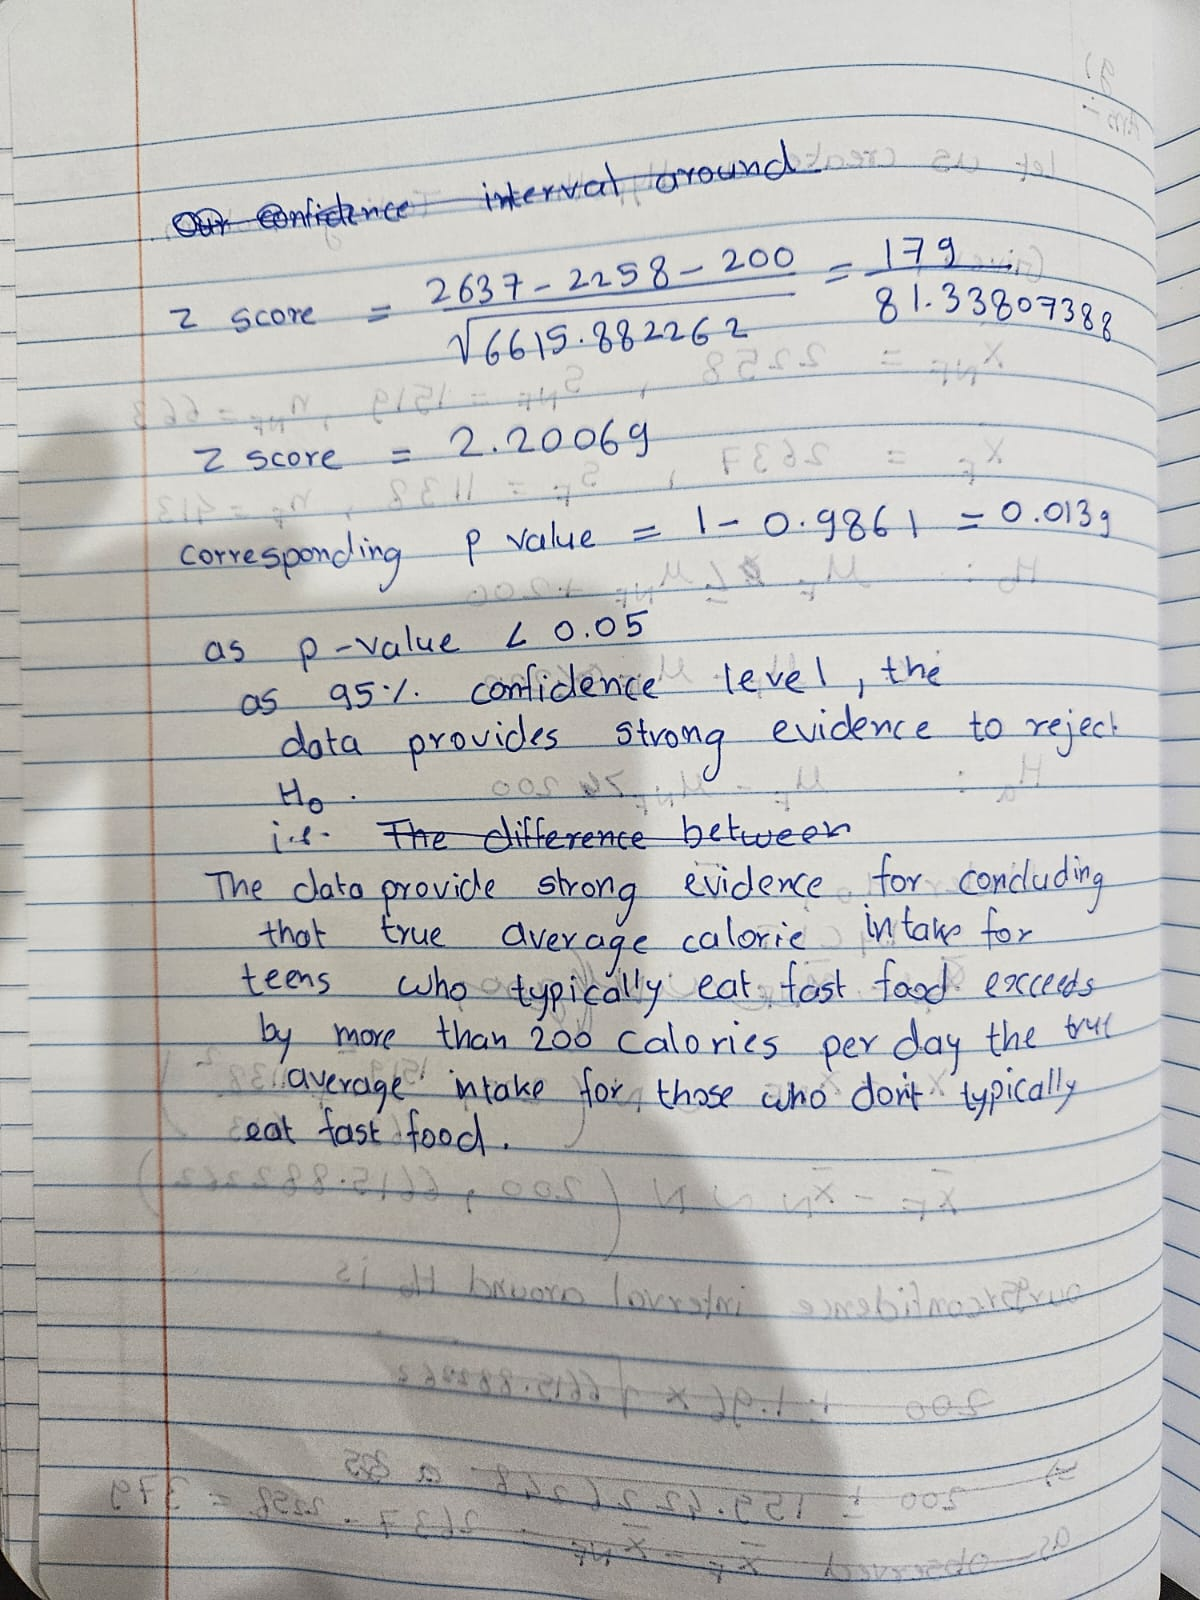